In [277]:
import pandas as pd
import re
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score,classification_report,confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [278]:
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

In [279]:
import pandas as pd

encodings_to_try = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(r"C:\Users\K\Downloads\Great Learning\NLP\Project\Spam Detection Collection\spam.csv", encoding=encoding)
        print(f"Successfully loaded using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to load using encoding: {encoding}")

Failed to load using encoding: utf-8
Successfully loaded using encoding: latin-1


In [280]:
df.head()

v1  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                            v2  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

  Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [281]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [282]:
df.duplicated().sum()

403

In [283]:
df = df.drop_duplicates(keep='first')

In [284]:
df.duplicated().sum()

0

In [285]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [286]:
df.head()

v1  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                            v2  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

In [287]:
df.rename(columns = {'v1':'label','v2':'text'},inplace=True)

In [288]:
df

label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
5     spam   
6      ham   
7      ham   
8     spam   
9     spam   
10     ham   
11    spam   
12    spam   
13     ham   
14     ham   
15    spam   
16     ham   
17     ham   
18     ham   
19    spam   
20     ham   
21     ham   
22     ham   
23     ham   
24     ham   
25     ham   
26     ham   
27     ham   
28     ham   
29     ham   
30     ham   
31     ham   
32     ham   
33     ham   
34    spam   
35     ham   
36     ham   
37     ham   
38     ham   
39     ham   
40     ham   
41     ham   
42    spam   
43     ham   
44     ham   
45     ham   
46     ham   
47     ham   
48     ham   
49     ham   
50     ham   
51     ham   
52     ham   
53     ham   
54    spam   
55     ham   
56    spam   
57     ham   
58     ham   
59     ham   
60     ham   
61     ham   
62     ham   
63     ham   
64     ham   
65    spam   
66     ham   
67    spam   
68    spam   
69     ham   
70     ham   
71     ham   
72     ham   
73     ham   
74     ham   
75     ham   
76     ham   
77     ham   
78     ham   
79     ham   
80     ham   
81     ham   
82     ham   
83     ham   
84     ham   
85     ham   
86     ham   
87     ham   
88     ham   
89     ham   
90     ham   
91     ham   
92     ham   
93    spam   
94     ham   
95    spam   
96     ham   
97     ham   
98     ham   
99     ham   
100    ham   
101    ham   
103    ham   
104    ham   
105    ham   
106    ham   
107    ham   
108    ham   
109    ham   
110    ham   
111    ham   
112    ham   
113   spam   
114    ham   
115    ham   
116   spam   
117    ham   
118    ham   
119   spam   
120   spam   
121    ham   
122   spam   
123    ham   
124    ham   
125    ham   
126    ham   
127    ham   
128    ham   
129    ham   
130    ham   
131    ham   
132    ham   
133   spam   
134   spam   
135    ham   
136    ham   
137    ham   
138   spam   
139    ham   
140    ham   
141    ham   
142    ham   
143    ham   
144    ham   
145    ham   
146   spam   
147    ham   
148    ham   
149    ham   
150    ham   
151    ham   
152    ham   
154    ham   
155    ham   
156    ham   
157    ham   
158   spam   
159   spam   
160    ham   
161    ham   
162    ham   
163   spam   
164   spam   
165    ham   
166   spam   
167    ham   
168    ham   
169    ham   
170    ham   
171    ham   
172    ham   
173    ham   
174    ham   
175    ham   
176    ham   
177    ham   
178    ham   
179    ham   
180    ham   
181    ham   
182    ham   
183    ham   
184    ham   
185    ham   
186    ham   
187   spam   
188    ham   
189    ham   
190   spam   
191    ham   
192    ham   
193    ham   
194    ham   
195    ham   
196    ham   
197    ham   
198    ham   
199    ham   
200    ham   
201    ham   
202    ham   
203    ham   
204    ham   
205    ham   
207    ham   
208    ham   
209    ham   
210    ham   
211    ham   
212    ham   
213    ham   
214    ham   
215    ham   
216    ham   
217    ham   
218    ham   
219    ham   
220    ham   
221    ham   
223    ham   
224   spam   
225    ham   
226   spam   
227    ham   
228    ham   
229    ham   
230    ham   
231    ham   
232    ham   
233    ham   
234   spam   
235    ham   
236    ham   
237    ham   
238    ham   
239   spam   
240    ham   
241    ham   
242    ham   
243    ham   
244    ham   
245    ham   
246    ham   
247    ham   
248    ham   
249   spam   
250    ham   
251    ham   
252    ham   
253    ham   
254    ham   
255    ham   
256    ham   
257    ham   
258   spam   
259    ham   
260    ham   
261    ham   
262    ham   
263   spam   
264    ham   
265    ham   
266    ham   
267   spam   
268    ham   
269   spam   
270    ham   
271    ham   
272   spam   
273    ham   
274    ham   
275    ham   
276    ham   
277    ham   
278    ham   
279    ham   
280    ham   
281    ham   
282    ham   
283    ham   
284    ham   
285    ham   
286    ham   
287    ham   
288    ham   
2

In [289]:
df['num_of_words'] = df['text'].apply(lambda x : len(x.split())) 
df['num_of_characters'] = df['text'].apply(lambda x: sum(len(character) for word in x.split() for character in word))
df['length_of_sentence'] = df['text'].apply(lambda x: len(x))
df['target'] = df['label'].apply(lambda x : 1 if x=='spam' else 0)

<Axes: >

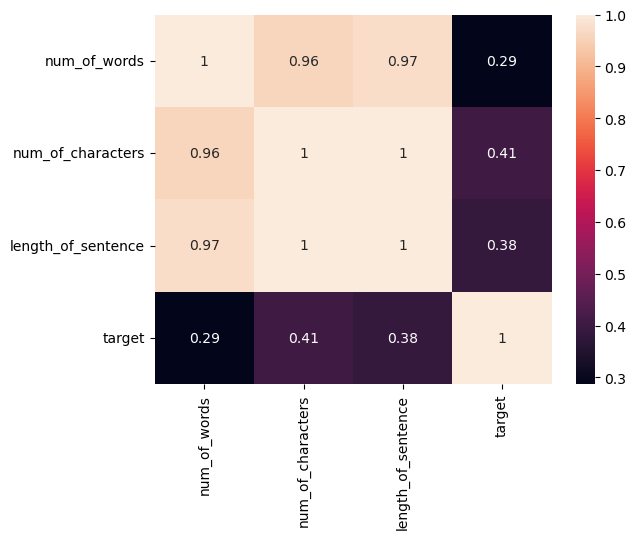

In [290]:
sns.heatmap(df.corr(),annot=True)

In [291]:
px.scatter_matrix(df,dimensions=['num_of_words','num_of_characters','length_of_sentence'],color='label')

In [292]:
px.parallel_coordinates(df,color='target')

In [312]:
px.scatter(df,x='num_of_characters',y='length_of_sentence',color='label',trendline="ols",marginal_y="box", marginal_x="box")

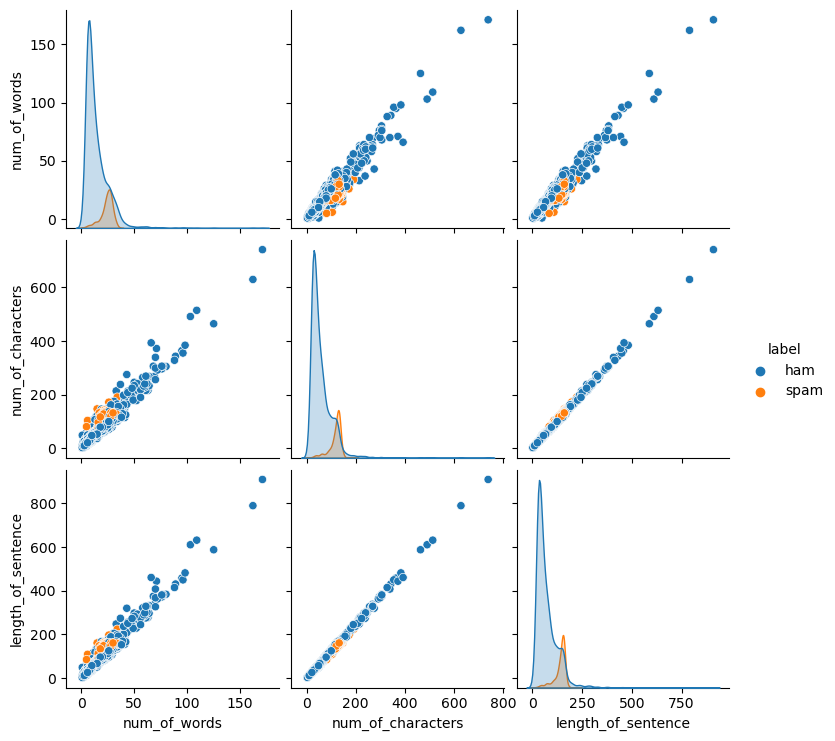

In [293]:
sns.pairplot(data=df.drop(columns='target'),hue='label')
plt.show()

In [294]:
def preprocess_text(text):
    global stop_words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    text = ' '.join([word for word in tokens if word.lower() not in stop_words])
    
    return text

df['text'] = df['text'].apply(preprocess_text)

df.head()


label  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                          text  \
0                           go jurong point crazy available bugis n great world la e buffet cine got amore wat   
1                                                                                      ok lar joking wif u oni   
2  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs   
3                                                                          u dun say early hor u c already say   
4                                                                  nah dont think goes usf lives around though   

   num_of_words  num_of_characters  length_of_sentence  target  
0            20                 92                 111       0  
1             6                 24                  29       0  
2            28                128                 155       1  
3            11                 39                  49       0  
4            13                 49                  61       0

In [295]:
X = df['text'].values
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4135,)
X_test shape: (1034,)
y_train shape: (4135,)
y_test shape: (1034,)


In [296]:
vectorizer = CountVectorizer(ngram_range=(1, 2))

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

# print("Term-Document Matrix (Training Set):")
# print(pd.DataFrame(X_train_vectorized.toarray(), columns=feature_names))

# print("Term-Document Matrix (Testing Set):")
# print(pd.DataFrame(X_test_vectorized.toarray(), columns=feature_names))


In [297]:
# vectorizer.vocabulary_


In [298]:
def update_performance(name,model):
    MultiNB_model = model()
    MultiNB_model.fit(X_train_vectorized,y_train)
    pred_test = MultiNB_model.predict(X_test_vectorized)
    print(classification_report(y_test,pred_test))

In [299]:
MultiNB_model = MultinomialNB()
MultiNB_model.fit(X_train_vectorized,y_train)
pred_test = MultiNB_model.predict(X_test_vectorized)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.90      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [300]:
confusion_matrix(y_test,pred_test)

array([[882,   7],
       [ 15, 130]], dtype=int64)

In [301]:
X = df['text'].values
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

# print("Term-Document Matrix (Training Set):")
# print(pd.DataFrame(X_train_vectorized.toarray(), columns=feature_names))

# print("Term-Document Matrix (Testing Set):")
# print(pd.DataFrame(X_test_vectorized.toarray(), columns=feature_names))

In [302]:
# vectorizer.vocabulary_

In [303]:
MultiNB_model = MultinomialNB()
MultiNB_model.fit(X_train_vectorized,y_train)
pred_test = MultiNB_model.predict(X_test_vectorized)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       1.00      0.61      0.76       145

    accuracy                           0.95      1034
   macro avg       0.97      0.81      0.87      1034
weighted avg       0.95      0.95      0.94      1034



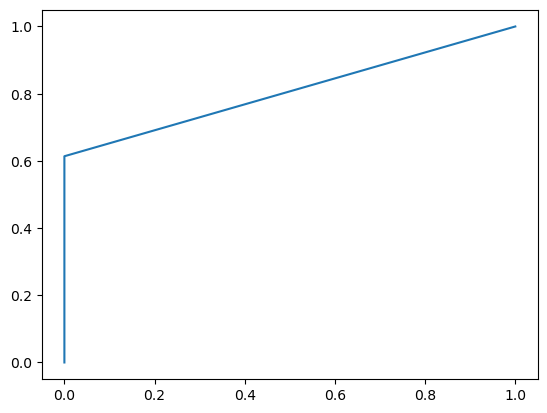

In [304]:
fpr,tpr,threshold =roc_curve(y_test,pred_test)
plt.plot(fpr,tpr)
plt.show()

In [308]:
confusion_matrix(y_test,pred_test)

array([[889,   0],
       [ 56,  89]], dtype=int64)

In [309]:
text = '''Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's'''
X_test_vectorized = vectorizer.transform([text])
print('predicted :',labelencode.inverse_transform(MultiNB_model.predict(X_test_vectorized))[0])


predicted : spam


In [310]:
text = '''I HAVE A DATE ON SUNDAY WITH WILL!!'''
X_test_vectorized = vectorizer.transform([text])
print('predicted :',labelencode.inverse_transform(MultiNB_model.predict(X_test_vectorized))[0])


predicted : ham
